In [4]:
#First of all, I installed twint library via anaconda prompt with the below code to get the correct and updated version
#pip3 install --user --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint

import twint # import twint
import nest_asyncio
nest_asyncio.apply()
#we need nest_asyncio to call async routines,similar as performing concurrent tasks.

#Data Processing and Manipulation
import pandas as pd
import numpy as np
import os as o
import re
import string
import numpy as np


from PIL import Image # for opening, manipulating, and saving many different image file 

#Text Processing
import nltk
from nltk import sent_tokenize, word_tokenize # to create word tokens
from nltk.stem.snowball import SnowballStemmer # didnt eventually use this
from nltk.stem.wordnet import WordNetLemmatizer #to make words more understanble for sentiment analysis
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.corpus import words # Get all words in english language
from nltk import pos_tag # For Parts of Speech tagging
nltk.download("stopwords")
stopwords = stopwords.words("english") # livrary that imports all the stop words like the, he, have 
ps= nltk.PorterStemmer()

#For sentiment Analysis
from textblob import TextBlob

#Visalization
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


import warnings 
warnings.filterwarnings('ignore') # to ignore warnings

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
path = 'C:\\Users\\user\\Desktop\\Data Analytics\\\Python\Sentiment Analysis\\Tinder Swindler' #file path on my pc

In [13]:
o.chdir(path) # comfirming the path

In [7]:
# Minning the Data From Twitter using Twint

In [663]:
c = twint.Config() # Set up twint config

c.Search = "tinder swindler"
c.Lang = "en"
c.Hide_output = True
c.Store_json = True
c.Output = "custom_out.json"

# Run
#twint.run.Search(c)

In [26]:
df = pd.read_json("Tinder_Swindler.json", lines = True)

# Data Exploration 


In [27]:
df.shape

(3070, 36)

In [106]:
df.head(3)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1512956419678552066,1512632702377242624,2022-04-10 01:51:34 GMT Daylight Time,2022-04-10,01:51:34,100,1490442401370066945,thepureprophet,Wizards&Warlocks,,...,,,,,,"[{'screen_name': 'Williewolos', 'name': 'Willi...",,,,
1,1512956416411246593,1512956416411246592,2022-04-10 01:51:33 GMT Daylight Time,2022-04-10,01:51:33,100,1319625790632448000,stakeshuffle_,StakeShuffle_Bot,,...,,,,,,[],,,,
3,1512956409654222849,1512956409654222848,2022-04-10 01:51:32 GMT Daylight Time,2022-04-10,01:51:32,100,723140310554038272,humourme1234,Tom H,,...,,,,,,[],,,,


In [31]:
df.shape # 3070 tweets

(3070, 36)

In [32]:
df.duplicated(subset='id').sum() # Check for duplicate values

100

In [33]:
df=df.drop_duplicates(subset=['id']) # drop duplicate 

In [34]:
df.shape

(2970, 36)

In [35]:
#inspect columns
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [36]:
#keep only tweets that are in english language
df= df[df.language.str.contains('|'.join(["en"]))]


In [37]:
df.shape

(2256, 36)

In [41]:
#selecting only relevant columns
tweetdf = df[['id',  'date', 'time', 'username', 'tweet'
       , 'replies_count', 'retweets_count', 'likes_count',
       'hashtags']]

In [42]:
tweetdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2256 entries, 0 to 3069
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              2256 non-null   int64         
 1   date            2256 non-null   datetime64[ns]
 2   time            2256 non-null   object        
 3   username        2256 non-null   object        
 4   tweet           2256 non-null   object        
 5   replies_count   2256 non-null   int64         
 6   retweets_count  2256 non-null   int64         
 7   likes_count     2256 non-null   int64         
 8   hashtags        2256 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 141.0+ KB


In [43]:
#checkinf for null values
tweetdf.isnull().sum()

id                0
date              0
time              0
username          0
tweet             0
replies_count     0
retweets_count    0
likes_count       0
hashtags          0
dtype: int64

# Data Cleaning

In [44]:
# change data type
tweetdf['hashtags'] = tweetdf['hashtags'].astype(str)
tweetdf['tweet'] = tweetdf['tweet'].astype(str)
#tweetdf['time'] = pd.to_datetime(tweetdf["time"])
tweetdf['time'] = pd.to_datetime(tweetdf['time'],format= '%H:%M:%S' ).dt.time# conver from string to time format

In [45]:
#creating a duplicate data, sometjing i like to for many reasons.
tweetdf2 = tweetdf

In [46]:
tweetdf.head()

,id,date,time,username,tweet,replies_count,retweets_count,likes_count,hashtags
0,1512956419678552066,2022-04-10,01:51:34,thepureprophet,@Williewolos @JohnEDeaton1 @Belisarius2020 Hah...,0,0,0,[]
1,1512956416411246593,2022-04-10,01:51:33,stakeshuffle_,2022-04-09 StakeShuffle transaction volume was...,0,0,0,"['dcr', 'dao', 'decred', 'bitcoin', 'btc', 'dc..."
3,1512956409654222849,2022-04-10,01:51:32,humourme1234,Losers. All of them. #bitcoin,0,0,0,['bitcoin']
4,1512956402142117890,2022-04-10,01:51:30,crypto_tomp,#Bitcoin Video Update by Kevin Svenson,0,0,0,['bitcoin']
5,1512956392457523205,2022-04-10,01:51:27,malpamilo,I am claiming my free Lightning sats from @_bi...,0,0,0,"['bitcoin', 'btc', 'ln', 'lightningnetwork', '..."


In [47]:
#removing unrelated hashtages and tweets i found that from inspecting my data
tweetdf= tweetdf[~tweetdf.hashtags.str.contains('|'.join(["bitco"]))]

In [48]:
def hashclean(clean):
     hash = re.sub('[^A-Za-z0-9]+', '', hashtags)
     return hashclean
        

In [51]:
hashtagslist = tweetdf['hashtags'].tolist()

#convert to list
hashtags = []
for hash in hashtagslist:
    hash = hash.split()
    for i in hash:
        if len(i) > 2:
            hashtags.append(i)
hashtags =  [re.sub(r"[^a-zA-Z0-9]", " ", h) for h in hashtags] # to 
hashtags  = [x.strip() for x in hashtags]
            

In [52]:
hashcount = nltk.FreqDist(w.lower() for w in hashtags)
hash_tag = pd.DataFrame.from_dict(hashcount, orient='index').reset_index()
hash_tag.columns = ['hashtags', 'Count']
hash_tag.sort_values(by='Count', ascending=False, inplace=True)
hash_tag.head(10)

,hashtags,Count
12,tinderswindler,233
27,badvegan,68
32,inventinganna,31
40,netflix,30
14,thetinderswindler,27
47,tinderdate,18
38,annadelvey,12
51,dating,10
18,tinder,10
185,tinderswinder,8


Tweet Cleaning and processing 

In this session, I used regular expression to remove symbols in the tweets with the help of a function, convert relevant emojis in the tweet to words and remove common words that adds no value to the tweets and its sentiment


In [53]:
txt_clean1= (r'http\S+|www\S+|https\S+')
txt_clean2 =(r'\@\w+|\#|\d+')
#txt_clean3 = (r'[^\w\s]',' ') # remove puntuations

In [54]:
emot_dict = {":)": "happy", ":‑)": "happy", ":-]": "happy", ":-3": "happy", ":->": 
                 "happy", "8-)": "happy",":-}": "happy",":o)": "happy",":c)": "happy", ":^)": "happy", "=]": "happy", 
                 "=)": "happy", "<3": "happy", ":-(": "sad", ":(": "sad", ":c": "sad", ":<": "sad", ":[": "sad", 
                 ">:[": "sad", ":{": "sad", ">:(": "sad", ":-c": "sad", ":-< ": "sad", ":-[": "sad", 
                 ":-||": "sad"}

In [55]:
# common words which will not be relevant in our analysis.
commonwords = ['tinder', 'tinderswindler', 'tinderswindler', 'tinderswinder', 'swindler', 'watched', 'thing', 'saw', 'watching', 'bitcoin','cant', 'wont', 'hadnt',
                    'havent', 'hasnt', 'isnt', 'shouldnt', 'couldnt', 'wasnt', 'werent', 'hmmm..'
                    'mustnt', '’', '..', '.', '.....', '....', '?', ',', '!','"']
stopwords = commonwords + stopwords

In [56]:
def tweet_to_words(tweet):
  # convert to lowercase
    tweet = tweet.lower()
    # remove non letters
    tweet = re.sub(txt_clean1, ' ', tweet)
    tweet = re.sub(txt_clean2, ' ', tweet)
    ##tweet = str(TextBlob(tweet).correct()) # can be used to correct spelling 
    # tokenize
    word_token =  word_tokenize(tweet)
    # remove stopwords
    words = [w for w in word_token if w not in emot_dict]
    words = [w for w in word_token if w not in stopwords]
    return " ".join(words)


In [57]:
#Here is a sample of how this functions works

print(tweet_to_words("the tinder swindler and bad vegan a while ago and the most puzzing thing to me is why do these women give these men their money?"))

bad vegan ago puzzing women give men money


In [58]:
tweetdf["Clean_tweet"] = tweetdf["tweet"].apply(tweet_to_words)
# remove all puntuations
tweetdf["Clean_tweet"] = tweetdf['Clean_tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x)) 

# Tweets Processing

In [59]:
#extract the action words/adjectives using nltk #to import  pos_tag, i had to downloaded >>> nltk.download()
def Adjectives(tweet):
    tweet = word_tokenize(tweet)  # convert string to tokens
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "JJ"]  # in pos_tag module "JJ is a symbol for Adjectives in NLTK library
    return " ".join(tweet)  # join words with a space in between them

In [60]:
tweetdf['Adj_tweet'] = tweetdf["Clean_tweet"].apply(Adjectives)
tweetdf["Adj_tweet"] = tweetdf["Adj_tweet"].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ') #to remove one letter words

In [78]:
# Combine all words into a list
tweet_tolist = tweetdf['Adj_tweet'].tolist()
Adj_list=[]
for item in tweet_tolist:
    item = item.split()
    for i in item:
        Adj_list.append(i)

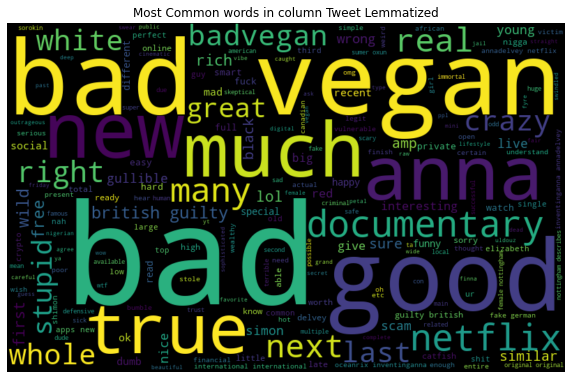

In [79]:
adj_words = ' '.join([text for text in tweetdf['Adj_tweet']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=200).generate(adj_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Lemmatized")
plt.show()

In [82]:
freq = nltk.FreqDist(w.lower() for w in Adj_list)
wordcount = pd.DataFrame.from_dict(freq, orient='index').reset_index()
wordcount.columns = ['Word', 'Count']
wordcount.sort_values(by='Count', ascending=False, inplace=True)
wordcount.head(5)

,Word,Count
74,bad,218
75,vegan,91
8,good,81
69,new,52
98,anna,45


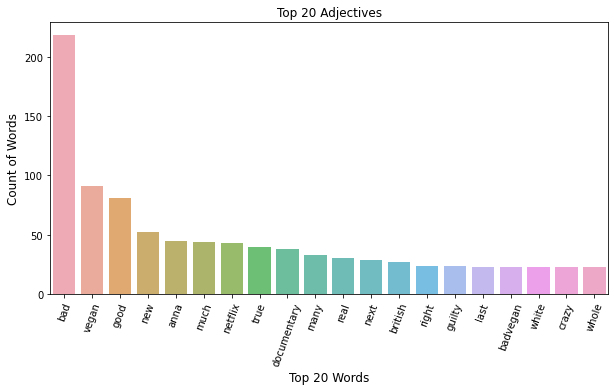

In [83]:
#rcParams['figure.figsize'] = 15,8
#sns.set(rc = {'figure.figsize':(4,8)})
#Display the result
wordcount = wordcount[:20]
plt.figure(figsize=(10,5))
sns.barplot(wordcount['Word'], wordcount['Count'], alpha=0.8)
plt.xticks(rotation=70)
plt.title('Top 20 Adjectives')
plt.ylabel("Count of Words", fontsize=12)
plt.xlabel("Top 20 Words", fontsize=12)
plt.show()

In [84]:
#I used lemmatization because it considers the context and converts the word to its meaningful base form
def lemwords(tweet):
    tweet_tokens = word_tokenize(tweet)
    lemmatizer = WordNetLemmatizer() # instatiate an object WordNetLemmatizer Class
    lemma_words = [lemmatizer.lemmatize(w) for w in tweet_tokens]
    return " ".join(lemma_words)

# SENTIMENT ANALYSIS


I lemmatize the tweet I used this over stemming because unlike stemming, this considers the context of each words) then used TextBlob to determing the polarity (which tells if a sentiment is Postive, Negative or Netural) and subjectivity of each tweet.

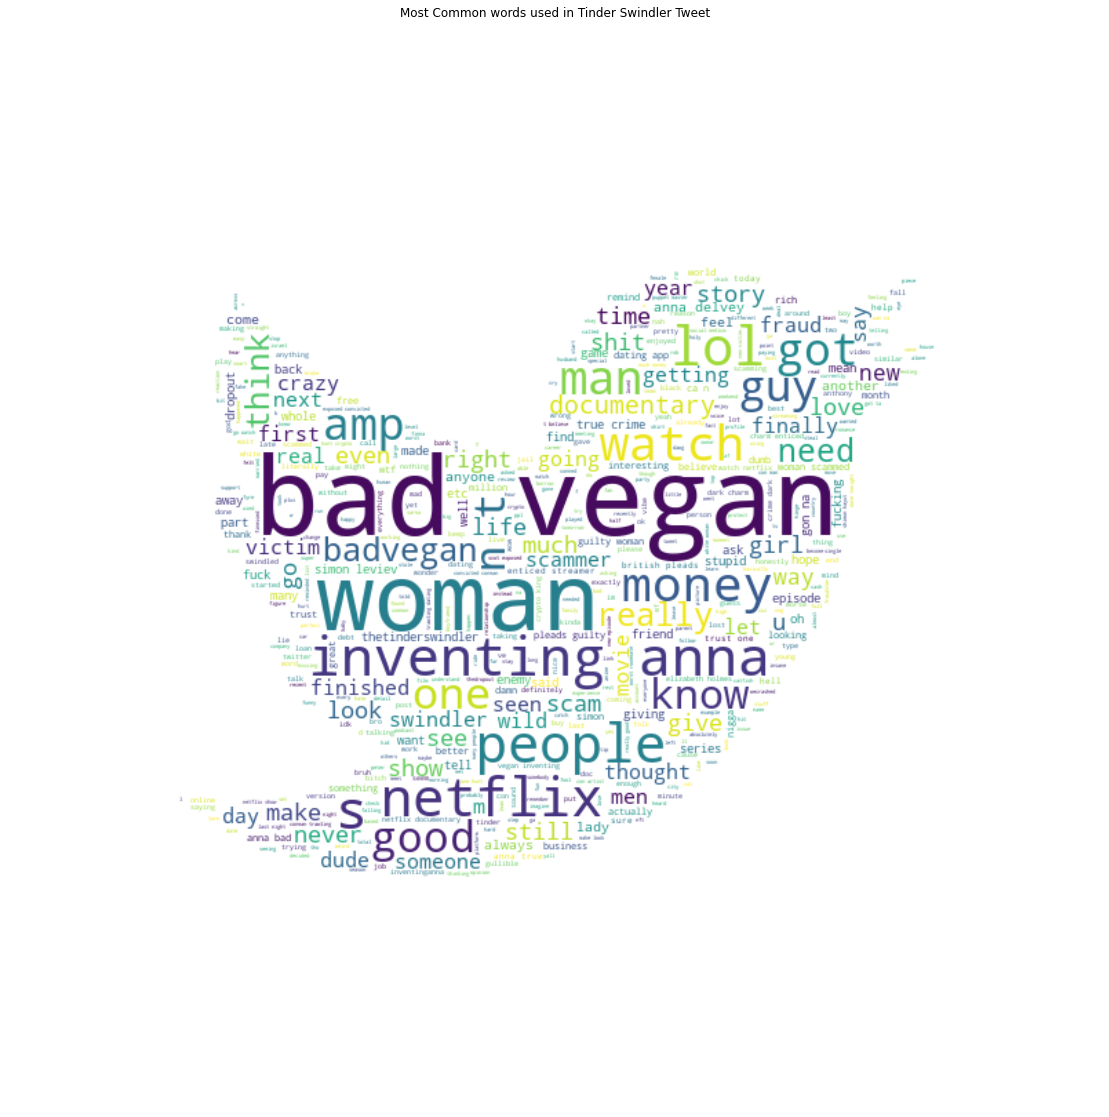

In [88]:
lemawords = " ".join(tweetdf['lemmatised_Twt'])
# Import Twitter Logo 
image = np.array(Image.open('twt_logo.png')) #I downloaded image and saved to my working directory
wc = WordCloud(width=1600, mask = image, background_color='white',max_font_size=200,max_words=2500).generate(lemawords)
fig = plt.figure(figsize=(15,15)) 
fig.set_figwidth(20) #  width
fig.set_figheight(20) #  height

plt.imshow(wc, interpolation='bilinear') # Display as an image
plt.axis('off') # Remove axis
plt.title("Most Common words used in Tinder Swindler Tweet")
plt.show() 

In [93]:
tweetdf["lemmatised_Twt"] = tweetdf["Clean_tweet"].apply(lemwords)

In [94]:
tweetdf.columns

Index(['id', 'date', 'time', 'username', 'tweet', 'replies_count',
       'retweets_count', 'likes_count', 'hashtags', 'Clean_tweet', 'Adj_tweet',
       'lemmatised_Twt'],
      dtype='object')

In [105]:
#twt_sentiment = tweetdf["Sentiment"].tolist()
#twt_sentiment = "".join(lema_list)

In [96]:
# Create function to obtain Subjectivity Score
def Subjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

# Create function to obtain Polarity Score
def Polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

def Sentiment(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"
    result = {}

In [97]:
analysis =TextBlob(" I’m pretty certain I would’ve been dumped hard")
analysis.sentiment

Sentiment(polarity=0.057539682539682536, subjectivity=0.7043650793650794)

In [98]:
tweetdf['Subjectivity'] = tweetdf['Clean_tweet'].apply(Subjectivity)
tweetdf['Polarity'] = tweetdf['Clean_tweet'].apply(Polarity)
tweetdf['Sentiment'] = tweetdf['Polarity'].apply(Sentiment)
tweetdf.head()

,id,date,time,username,tweet,replies_count,retweets_count,likes_count,hashtags,Clean_tweet,Adj_tweet,lemmatised_Twt,Subjectivity,Polarity,Sentiment
0,1512956419678552066,2022-04-10,01:51:34,thepureprophet,@Williewolos @JohnEDeaton1 @Belisarius2020 Hah...,0,0,0,[],hahaha try would dumb way move lightning node ...,,hahaha try would dumb way move lightning node ...,0.450000,-0.087500,Negative
6,1512956380268810243,2022-04-10,01:51:25,coryklippsten,My m.o. since '18 is to always do the best thi...,0,0,0,[],m o since always best bitcoiners beef w pas...,hard give free,m o since always best bitcoiners beef w past y...,0.472917,0.214583,Positive
7,1512956374849839105,2022-04-10,01:51:23,bluelightdiet,And the the saying goes buy gold silver and bi...,0,0,0,[],saying goes buy gold silver,,saying go buy gold silver,0.000000,0.000000,Neutral
8,1512956373457567744,2022-04-10,01:51:23,alohaeigoorg,@Excellion @elonmusk F''k Bitcoin. Any major ...,0,0,0,[],f k major cryptocurrency accepted,major,f k major cryptocurrency accepted,0.500000,0.062500,Positive
9,1512956366121418758,2022-04-10,01:51:21,xiaotian910925,@PiCoreTeam @nkokkalis @Chengdiao As mentioned...,0,0,0,[],mentioned slow progress kyc chinese miners dra...,slow chinese active sum chinese,mentioned slow progress kyc chinese miner drag...,0.260000,-0.186667,Negative


In [101]:
Sentiment_Count = tweetdf['Sentiment'].value_counts().rename_axis('Sentiment').to_frame('Tweets_Count').reset_index()
Sentiment_Count

,Sentiment,Tweets_Count
0,Neutral,840
1,Positive,781
2,Negative,591


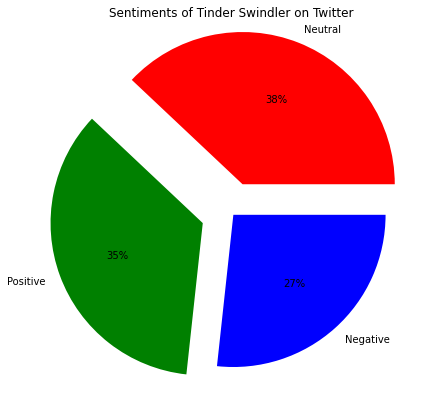

In [102]:

fig = plt.gcf()
fig.set_size_inches(10,7)
data = Sentiment_Count["Tweets_Count"]
labels = Sentiment_Count["Sentiment"]

explode = [0.2,0.2,0.02]
#define Seaborn color palette to use
#colors = sns.color_palette('bright')[0:5]
colors=['r', 'g', 'b']
#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', explode = explode)
plt.title('Sentiments of Tinder Swindler on Twitter')

plt.show()

# Checking relationship between Polarity and Subjectivity
for explanation: Polarity is the sentiment in a tweet

Subjectivity the level of influence personal feeling has on the tweet

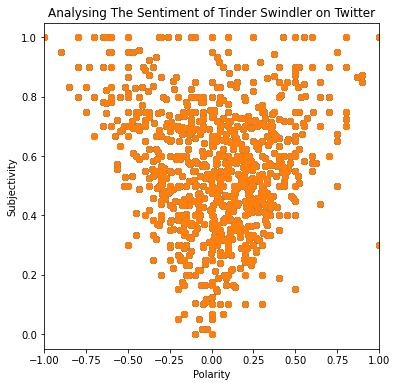

In [103]:
#using a scatter plot
plt.figure(figsize = (6, 6))
for i in range(0, tweetdf.shape[0]):
    plt.scatter(tweetdf['Polarity'], tweetdf['Subjectivity'])
    
plt.title('Analysing The Sentiment of Tinder Swindler on Twitter')
plt.xlim(-1,1)
plt.xlabel ('Polarity')
plt.ylabel ('Subjectivity')
plt.show()


THANK YOU FOR TAKING TIME TO GO THROUGH MY PROJECT. I HOPE YOU GENJOYED IT AS MUCH AS I DID